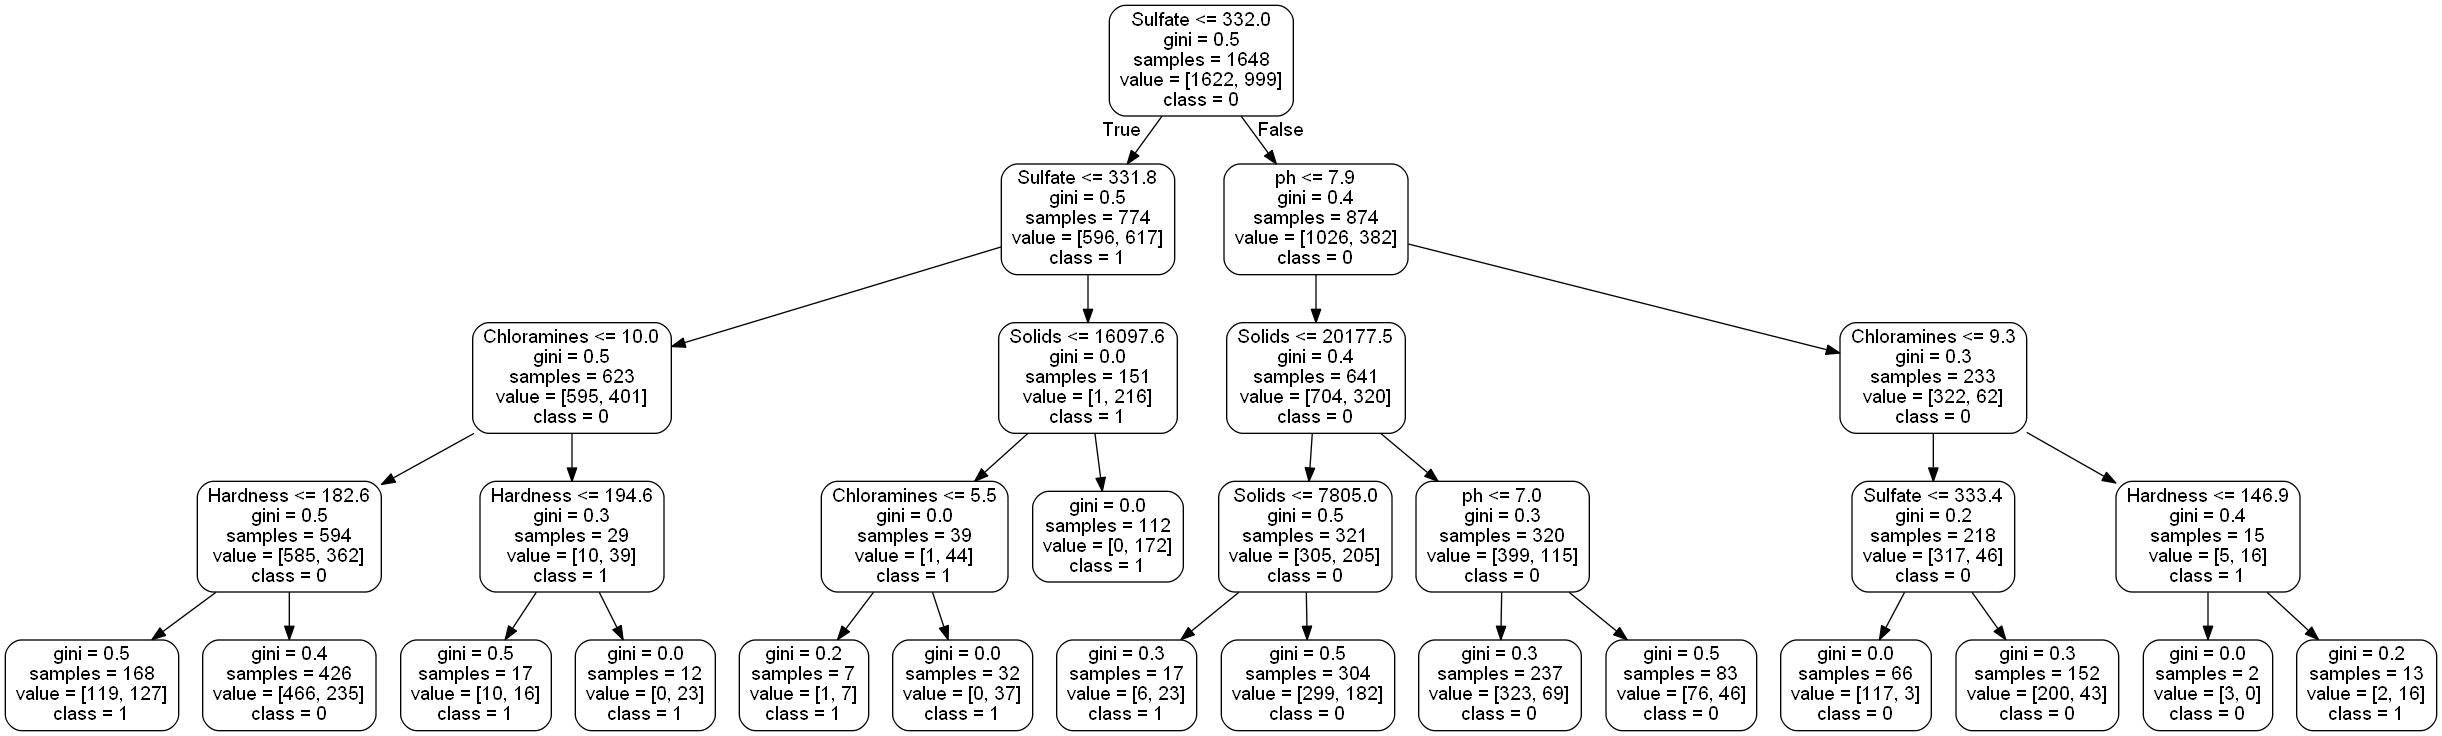

In [59]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.named_estimators_['Random Forest'].estimators_[7]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.named_estimators_['Random Forest'].estimators_[7]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_cols, rounded = True, precision = 1,class_names=['0','1'])
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image(graph.create_png())

In [1]:
"""The above is the final tree that was produced after fitting the data using Random Forest and Gradient Boosting. The model believe that Sulfate is the most important feature to split on when first distinguishing between drinkable and non-drinkable water. From this splits are made on Chloramines, Hardness, and ph levels to further determine if the water sample under question is drinkable.""".replace("\n","")

'The above is the final tree that was produced after fitting the data using Random Forest and Gradient Boosting. The model believe that Sulfate is the most important feature to split on when first distinguishing between drinkable and non-drinkable water. From this splits are made on Chloramines, Hardness, and ph levels to further determine if the water sample under question is drinkable.'

In [57]:
print("Accuracy:", round(np.mean(accuracy), 2))
print("Precision:", round(np.mean(precision), 2))
print("Recall:", round(np.mean(recall), 2))

Accuracy: 0.77
Precision: 0.88
Recall: 0.48


In [2]:
"""I used accuracy, precision, and recall deciding on the final model. This model is correct 77% of the time when predicting the target class drinkable water and non-drinkable water. A precision of 88% tells us the model is correct 88% of the time when predicting the target variable class drinkable water. Finally, a recall score of 48% says the model can detect 48% cases of drinkable water. Overall, this model is a great of distinguish between drinkable and non-drinkable water. However, improvements could always be made.""".replace("\n","")

'I used accuracy, precision, and recall deciding on the final model. This model is correct 77% of the time when predicting the target class drinkable water and non-drinkable water. A precision of 88% tells us the model is correct 88% of the time when predicting the target variable class drinkable water. Finally, a recall score of 48% says the model can detect 48% cases of drinkable water. Overall, this model is a great of distinguish between drinkable and non-drinkable water. However, improvements could always be made.'

In [1]:
# https://www.kaggle.com/jaykumar1607/water-quality-analysis-plotly-and-modelling

# Load Libraries

In [2]:
with hyperparameter tunning# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Data Viz
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold



# Functions Used

In [3]:
# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
def boxPlotter(DataFrame, ColumnName):
    # Plots boxplots for column given as parameter.    
    sns.catplot(x="Potability", y=ColumnName, data=DataFrame, kind="box")

In [4]:
# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
def distributionPlot(DataFrame):
     # Creates distribution plot.
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(DataFrame.columns[:-1])), desc = 'Your plots are being ready'):
        fig.add_subplot(np.ceil(len(DataFrame.columns)/3), 3, i+1)
        sns.distplot(
            DataFrame.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

# Load Data

In [5]:
# source: https://www.kaggle.com/adityakadiwal/water-potability?select=water_potability.csv
water_data = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Kaggle\Water Quality/water_potability.csv')
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.67,193.68,47580.99,7.17,359.95,526.42,13.89,66.69,4.44,1
3272,7.81,193.55,17329.80,8.06,NaN,392.45,19.90,NaN,2.80,1
3273,9.42,175.76,33155.58,7.35,NaN,432.04,11.04,69.85,3.30,1
3274,5.13,230.60,11983.87,6.30,NaN,402.88,11.17,77.49,4.71,1


In [6]:
water_data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [7]:
print("Rows:", water_data.shape[0])
print("Columns:", water_data.shape[1])

Rows: 3276
Columns: 10


# Data Exploration

In [8]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080804,196.369481,22014.092415,7.122241,333.775784,426.205171,14.284921,66.396281,3.966731,0.390110
std,1.594369,32.879680,8768.570852,1.583143,41.416864,80.824123,3.308232,16.174983,0.780354,0.487849
min,0.000000,47.430000,320.940000,0.350000,129.000000,181.480000,2.200000,0.740000,1.450000,0.000000
25%,6.090000,176.847500,15666.687500,6.130000,307.695000,365.735000,12.070000,55.847500,3.440000,0.000000
50%,7.040000,196.965000,20927.830000,7.130000,333.070000,421.885000,14.220000,66.620000,3.955000,0.000000
75%,8.060000,216.670000,27332.760000,8.112500,359.950000,481.790000,16.560000,77.337500,4.500000,1.000000
max,14.000000,323.120000,61227.200000,13.130000,481.030000,753.340000,28.300000,124.000000,6.740000,1.000000


In [10]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
"""I will need to fill in these missing values. Missing values will be determine/filled by predicting by leveraging the other
columns in this dataset""".replace("\n","")

'I will need to fill in these missing values. Missing values will be determine/filled by predicting by leveraging the othercolumns in this dataset'

In [12]:
# filling in NA with the mean based on the value of our predictor
# source: https://www.kaggle.com/deblina00/drinking-water-potability-eda-and-prediction#EXPLORING-DATA-THROUGH-VISUALS
pH_0 = water_data[water_data['Potability'] == 0]['ph'].median(skipna=True)
pH_1 = water_data[water_data['Potability'] == 1]['ph'].median(skipna=True)

water_data.loc[(water_data['Potability'] == 0) & (water_data['ph'].isna()), 'ph'] = pH_0
water_data.loc[(water_data['Potability'] == 1) & (water_data['ph'].isna()), 'ph'] = pH_1

In [13]:
# filling in NA with the mean based on the value of our predictor
# source: https://www.kaggle.com/deblina00/drinking-water-potability-eda-and-prediction#EXPLORING-DATA-THROUGH-VISUALS
sulf_0 = water_data[water_data['Potability'] == 0]['Sulfate'].median(skipna=True)
sulf_1 = water_data[water_data['Potability'] == 1]['Sulfate'].median(skipna=True)

water_data.loc[(water_data['Potability'] == 0) & (water_data['Sulfate'].isna()), 'Sulfate'] = sulf_0
water_data.loc[(water_data['Potability'] == 1) & (water_data['Sulfate'].isna()), 'Sulfate'] = sulf_1

In [14]:
# filling in NA with the mean based on the value of our predictor
# source: https://www.kaggle.com/deblina00/drinking-water-potability-eda-and-prediction#EXPLORING-DATA-THROUGH-VISUALS
tri_0 = water_data[water_data['Potability'] == 0]['Trihalomethanes'].median(skipna=True)
tri_1 = water_data[water_data['Potability'] == 1]['Trihalomethanes'].median(skipna=True)

water_data.loc[(water_data['Potability'] == 0) & (water_data['Trihalomethanes'].isna()), 'Trihalomethanes'] = tri_0
water_data.loc[(water_data['Potability'] == 1) & (water_data['Trihalomethanes'].isna()), 'Trihalomethanes'] = tri_1

In [15]:
water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
drinkable =round(water_data['Potability'].value_counts()[1]/(water_data['Potability'].value_counts()[0] + water_data['Potability'].value_counts()[1])
,2)
not_drinkable =round(water_data['Potability'].value_counts()[0]/(water_data['Potability'].value_counts()[0] + water_data['Potability'].value_counts()[1])
,2)
print("Percentage of drinkable water:", drinkable)
print("Percentage of non-drinkable water:", not_drinkable)

Percentage of drinkable water: 0.39
Percentage of non-drinkable water: 0.61


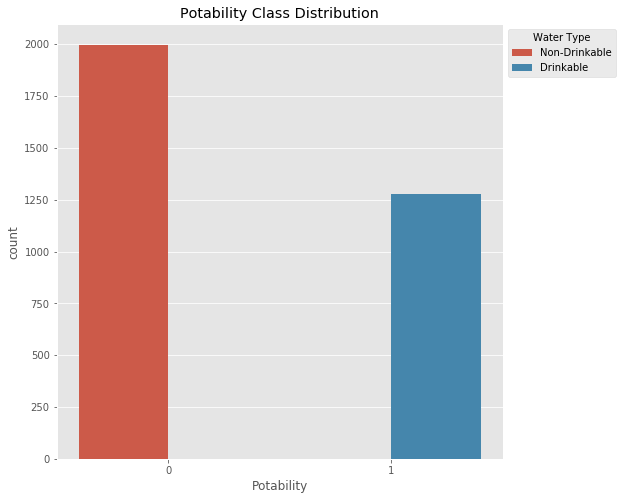

In [17]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x='Potability', hue='Potability' ,data=water_data)




plt.title("Potability Class Distribution")
legend_labels = ['Non-Drinkable', 'Drinkable']
ax.legend(legend_labels,bbox_to_anchor=(1,1), title='Water Type')
plt.show()

In [18]:
"""Our predictor variable contains 2 levels, 0 and 1. 61% of the classes are not drinkable while 39% is classified as drinkable.
It is worth keeping mind there may be a bit of an unbalanced issue among the 2 class values that needs to be accounted for.""".replace("\n","")

'Our predictor variable contains 2 levels, 0 and 1. 61% of the classes are not drinkable while 39% is classified as drinkable.It is worth keeping mind there may be a bit of an unbalanced issue among the 2 class values that needs to be accounted for.'

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


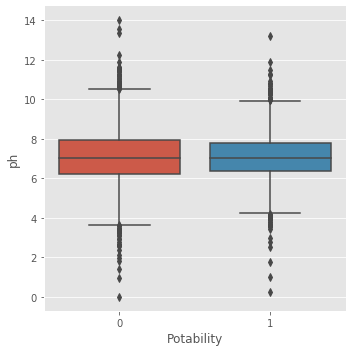

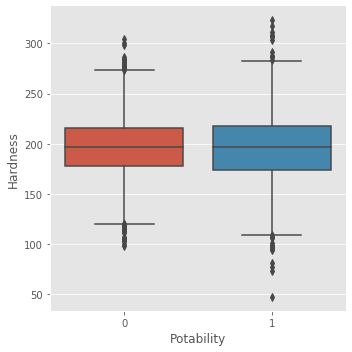

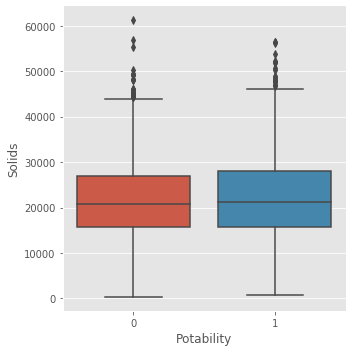

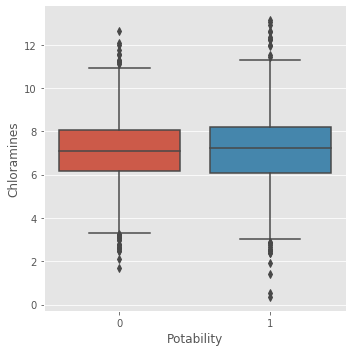

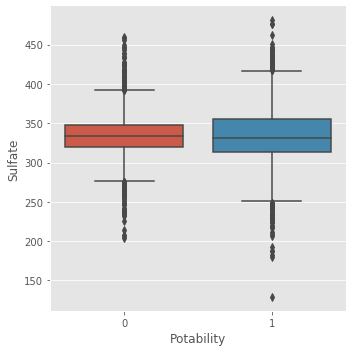

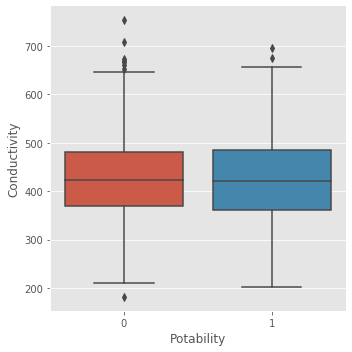

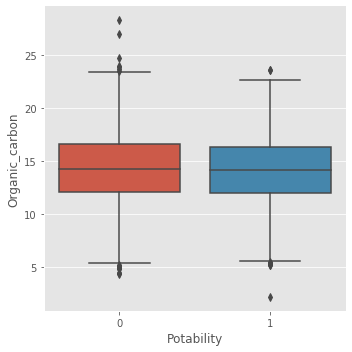

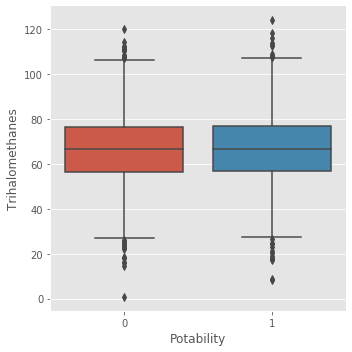

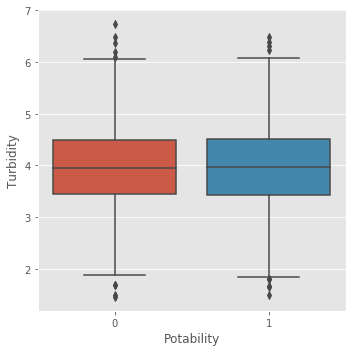

In [19]:
# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
cols = list(water_data.columns[:-1]) # -1 will exclude the dependent variable, Potability.
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
     boxPlotter(water_data, column)

In [20]:
"""The above is a box plot for each feature against the predictor class Potability. The box plots show that each feature has multiple outliers when compared against whether water is drinkable or not. For example, pH, which is a measure acidity, contains multiple outliers for both water that is drinkable and not drinkable. When doing analysis this will have to be accounted for since it could have a bias towards the model and lead to incorrect predictions. Outliers will have to be either handled with a specific modeling technique or be kept in mind when interpreting the output of the models built""".replace("\n","")

'The above is a box plot for each feature against the predictor class Potability. The box plots show that each feature has multiple outliers when compared against whether water is drinkable or not. For example, pH, which is a measure acidity, contains multiple outliers for both water that is drinkable and not drinkable. When doing analysis this will have to be accounted for since it could have a bias towards the model and lead to incorrect predictions. Outliers will have to be either handled with a specific modeling technique or be kept in mind when interpreting the output of the models built'

C:\Users\ranih\anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


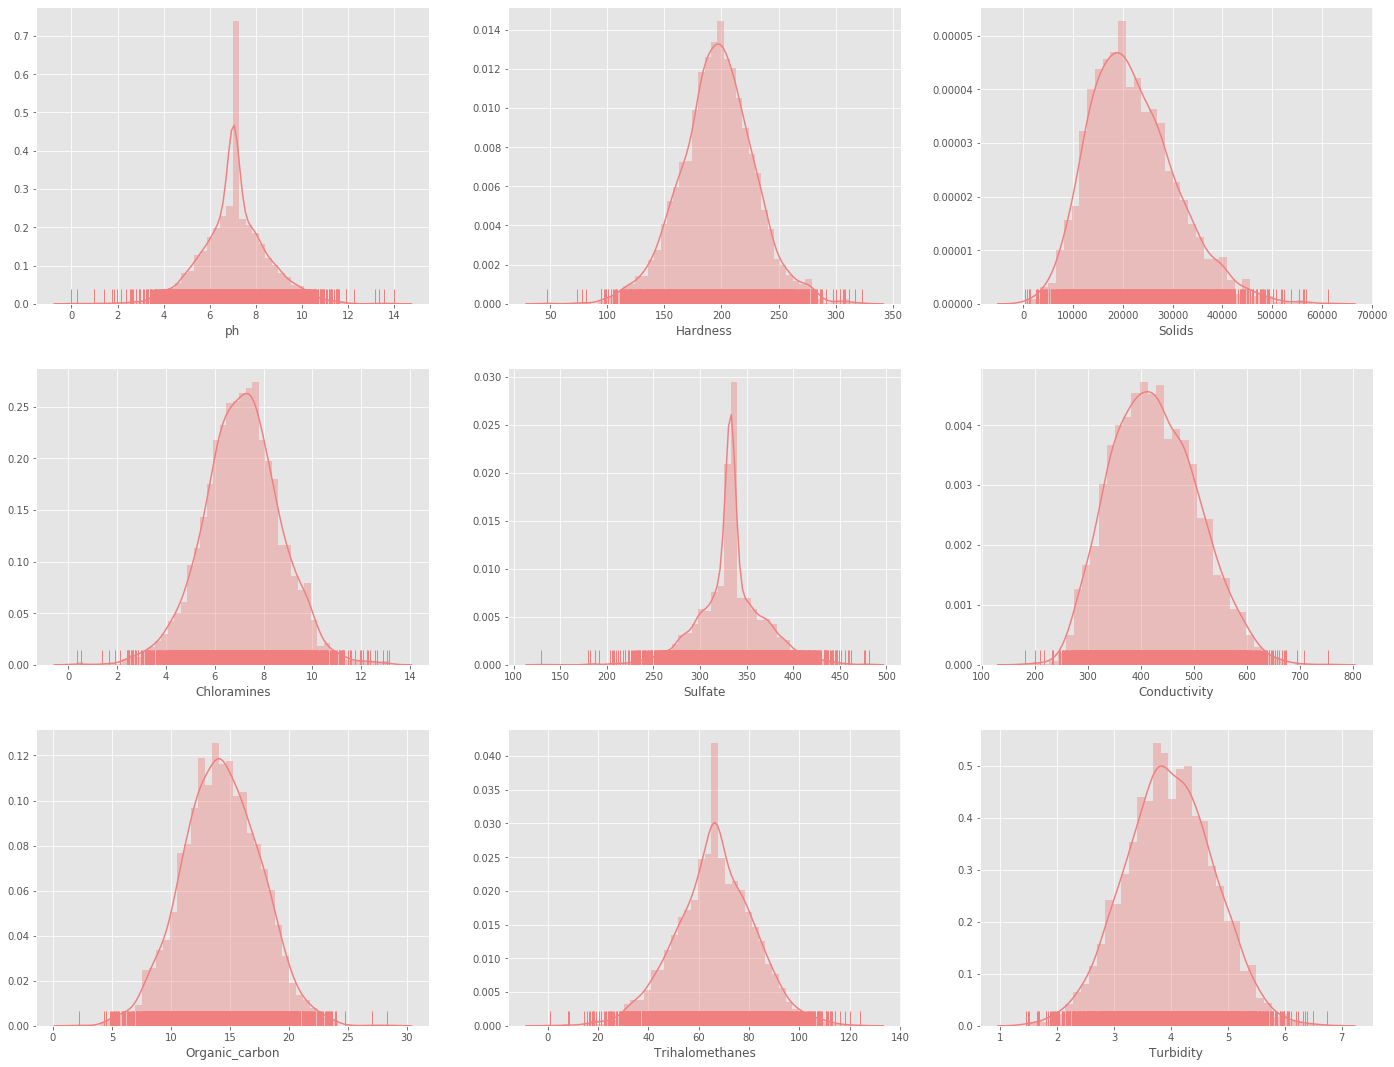

In [21]:
# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
distributionPlot(water_data)

In [22]:
"""Overall, the features of this dataset appear to have a fairly normal disribution. Solid appears to be one feature that contains a right skew and it will be good to explore the feature further. However, it will still be 
useful to normalize the features when running our data through the models.""".replace("\n", "")

'Overall, the features of this dataset appear to have a fairly normal disribution. Solid appears to be one feature that contains a right skew and it will be good to explore the feature further. However, it will still be useful to normalize the features when running our data through the models.'

# Models
 - K-nearest neighbors
 - Logistical Regression
 - Decision Tree
 - Random Forrest

In [23]:
# shuffle the data
water_data = water_data.sample(frac=1)
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2741,8.560,244.80,14254.66,7.45,315.97,500.59,18.23,57.37,2.94,1
505,9.920,207.07,16544.28,7.04,363.04,278.75,17.05,44.30,4.12,0
1158,10.420,167.42,34535.55,6.35,344.31,491.52,19.36,45.10,4.21,1
2200,7.035,188.40,21875.22,7.14,408.86,616.12,8.97,59.71,4.12,0
2691,7.035,231.97,21460.84,8.67,360.67,375.08,12.18,66.86,3.96,0


In [24]:
X = water_data.drop('Potability', axis = 1)
y = water_data.Potability

In [25]:
# rounding float features to 2 decimal places
for value in X:
    X[value] = round(X[value],2)
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2741,8.56,244.80,14254.66,7.45,315.97,500.59,18.23,57.37,2.94
505,9.92,207.07,16544.28,7.04,363.04,278.75,17.05,44.30,4.12
1158,10.42,167.42,34535.55,6.35,344.31,491.52,19.36,45.10,4.21
2200,7.04,188.40,21875.22,7.14,408.86,616.12,8.97,59.71,4.12
2691,7.04,231.97,21460.84,8.67,360.67,375.08,12.18,66.86,3.96


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, stratify= y)

In [27]:
# source: https://www.kaggle.com/jaykumar1607/water-quality-analysis-plotly-and-modelling
filterwarnings('ignore')
models =[("Logistical Regression:", LogisticRegression(max_iter=1000)),('K-nearest neighbors',KNeighborsClassifier(n_neighbors=10)),
         ("Decision Tree", DecisionTreeClassifier()),('Random Forrest',RandomForestClassifier()),('ADA Boost',AdaBoostClassifier()),('XG Boost',GradientBoostingClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    #score = round(precision_score(y_test, model_results,average='macro'),3)
    #results.append(score)
    precision = round(precision_score(y_test, model_results),3)
    recall = round(recall_score(y_test, model_results),3)
    results.append((precision, recall))
    names.append(name)
    finalResults.append((name,precision, recall))
    
finalResults.sort(key=lambda var:var[1],reverse=True)

finalResults

[('XG Boost', 0.757, 0.496),
 ('ADA Boost', 0.722, 0.399),
 ('Random Forrest', 0.72, 0.556),
 ('Decision Tree', 0.616, 0.619),
 ('K-nearest neighbors', 0.392, 0.133),
 ('Logistical Regression:', 0.0, 0.0)]

In [28]:
"""Running the water quality data set through a few base models above the models that performed best were: Random Forrest, XG-Boost, K-Nearest Neighbors, and Decision Tree. To see if these models can be improved further, I will run the same models again with hyperparameter tuning.""".replace("\n", "")

'Running the water quality data set through a few base models above the models that performed best were: Random Forrest, XG-Boost, K-Nearest Neighbors, and Decision Tree. To see if these models can be improved further, I will run the same models again with hyperparameter tuning.'

## Hyperparameter tuning: Random Forrest

In [29]:
# source: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [30]:
# shuffle the data
water_data = water_data.sample(frac=1)
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
287,10.00,143.09,46113.96,12.91,331.84,574.56,16.96,36.77,4.75,1
1483,7.04,246.24,6974.23,9.81,417.91,355.53,13.33,68.39,4.14,1
973,4.44,240.17,24070.26,9.77,338.05,533.97,11.88,69.04,5.04,0
1279,7.03,205.40,21884.54,7.28,304.73,442.41,15.84,65.58,2.94,0
330,6.74,220.10,24694.74,8.37,331.84,384.31,6.75,8.18,4.06,1


In [31]:
X = water_data.drop('Potability', axis = 1)
y = np.array(water_data['Potability'])
feature_list = list(X.columns)
# convert to numpay array for ML 
X = np.array(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y)

In [33]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2293, 9)
Training Labels Shape: (2293,)
Testing Features Shape: (983, 9)
Testing Labels Shape: (983,)


In [34]:
model_parameters = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    
    'ADA':
    {
        'model':AdaBoostClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000]        }
    },
    
    'KNN':
    {
        'model': KNeighborsClassifier(),
        'params':
        {
            'n_neighbors': [5,7,9],
            'weights': ['uniform','distance'],
            'algorithm':['ball_tree','kd_tree','brute','auto'],
            'metric': ['euclidean','manhattan','minkowski']
        }
    },
    
    'Logistical Regression':
    {
        'model': LogisticRegression(),
        'params':
        {
            'penalty':['l1','l2','elastic','none'],
            'C': [0.001,0.01,0.1,1,10,100]
        }
    },
    
    
    
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'criterion': ['entropy','gini'],
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}

In [35]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = list()

for model_name, parameters in model_parameters.items():
    random_search = RandomizedSearchCV(parameters['model'], parameters['params'], cv = cv, n_iter=20) 
    random_search.fit(X,y)
    scores.append([model_name, dict(random_search.best_params_), random_search.best_score_])

In [36]:
data = pd.DataFrame(scores, columns = ['Model', 'Parameters', 'Score'])
data

,Model,Parameters,Score
0,XGB,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.794111
1,ADA,"{'n_estimators': 1000, 'learning_rate': 0.1}",0.751986
2,KNN,"{'weights': 'distance', 'n_neighbors': 9, 'met...",0.573715
3,Logistical Regression,"{'penalty': 'l2', 'C': 0.01}",0.610195
4,Random Forest,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.794262


In [37]:
data['Parameters'][4]

{'n_estimators': 200,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [38]:
for i in data['Parameters']:
    print(i)

{'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.01}
{'n_estimators': 1000, 'learning_rate': 0.1}
{'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan', 'algorithm': 'auto'}
{'penalty': 'l2', 'C': 0.01}
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


In [39]:
"""Based on the results above, I will run a ensemble method leveraging XGB and Random Forrest to yield the highest
 quality predictions.""".replace("\n","")

'Based on the results above, I will run a ensemble method leveraging XGB and Random Forrest to yield the highest quality predictions.'

In [40]:
parameters = data['Parameters']
model = VotingClassifier(estimators=[
                                        ('XGB', GradientBoostingClassifier(**parameters[0])),
                                        ('Random Forest', RandomForestClassifier(**parameters[4])),],voting='hard')

accuracy, precision, recall = list(), list(), list()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
cv.get_n_splits(X,y)

for train_index, test_index in cv.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    
    prec = precision_score(y_test, y_pred)
    precision.append(prec)
    
    rec = recall_score(y_test, y_pred)
    recall.append(rec)

In [41]:
print("Accuracy:", round(np.mean(accuracy), 2))
print("Precision:", round(np.mean(precision), 2))
print("Recall:", round(np.mean(recall), 2))

Accuracy: 0.79
Precision: 0.86
Recall: 0.55


In [42]:
Predictions_Df = pd.DataFrame(X_test, columns=water_data.columns[:-1])
Predictions_Df['Predictions_Potability'] = y_pred
Predictions_Df.head(15)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predictions_Potability
0,6.070,217.83,17162.75,3.52,319.04,612.09,16.54,64.83,2.69,1
1,7.190,209.68,24909.78,6.69,331.84,501.79,16.09,75.67,3.96,1
2,6.990,152.98,20389.59,2.65,331.25,460.15,15.49,69.67,3.72,1
3,6.850,165.82,6068.45,6.13,373.21,442.79,11.12,64.03,4.26,0
4,6.710,209.78,14794.41,7.81,333.39,553.64,8.03,78.24,3.17,0
5,7.035,159.40,61227.20,3.71,312.98,377.07,17.25,82.20,3.86,0
6,7.035,168.04,18564.37,8.56,345.21,419.13,18.46,59.70,2.96,0
7,7.040,250.71,27355.93,6.48,377.36,559.82,13.65,77.92,2.97,1
8,7.035,206.58,40710.52,8.81,320.45,468.05,14.52,71.45,5.49,0
9,7.150,238.80,14708.47,8.61,450.91,365.74,14.97,53.14,2.63,1


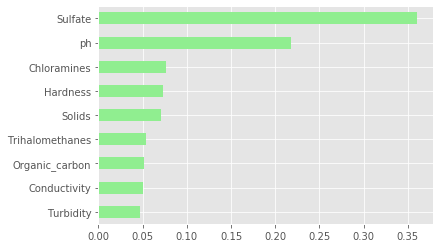

In [43]:
feature_cols = list(Predictions_Df.columns[:-1])
importances_dt = pd.Series(model.named_estimators_['Random Forest'].feature_importances_ ,index = feature_cols)
sorted_importances_df = importances_dt.sort_values()
# create a horizontal bar plot
sorted_importances_df.plot(kind="barh", color="lightgreen")
plt.show()

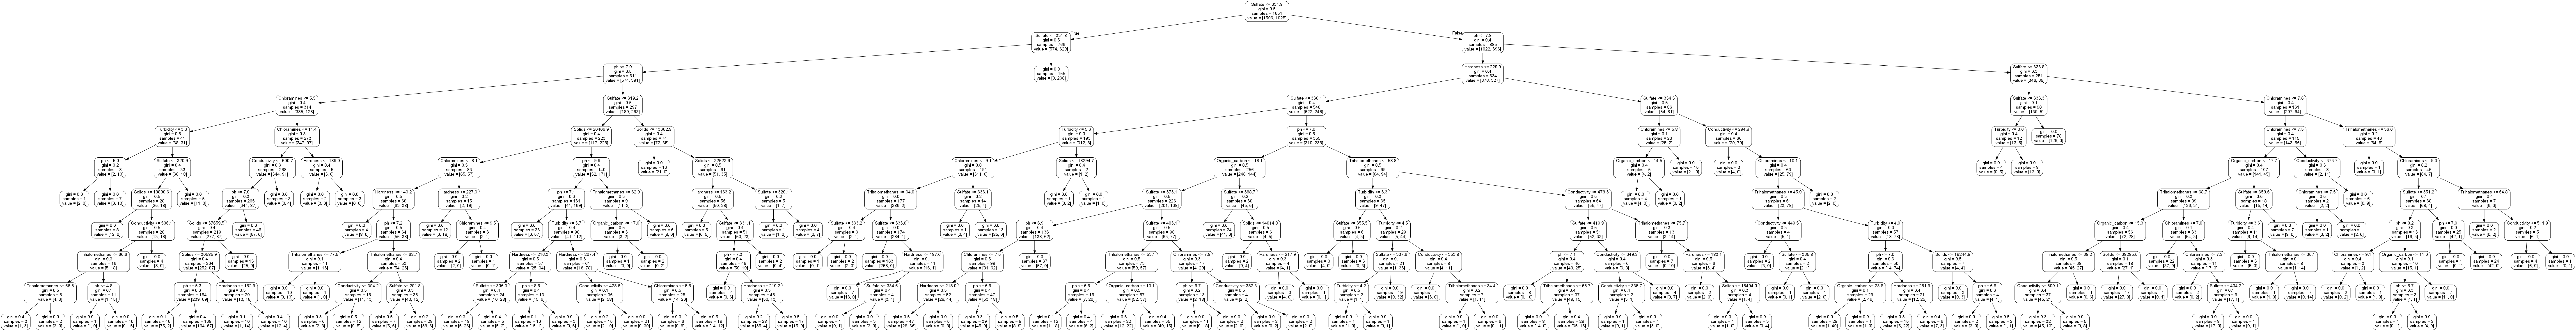

In [45]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image  
# Pull out one tree from the forest
tree = model.named_estimators_['Random Forest'].estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.named_estimators_['Random Forest'].estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image(graph.create_png())

In [46]:
# Random Forest with top 5 important features

In [47]:
# shuffle the data
water_data = water_data.sample(frac=1)
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
912,8.270,195.80,18091.20,7.42,365.41,369.20,17.00,66.54,2.58,0
193,9.320,129.82,16002.14,4.41,271.67,499.84,13.08,82.84,4.21,0
1393,7.035,202.89,24518.57,7.22,360.15,492.35,16.74,72.71,4.17,0
45,5.700,216.85,35606.44,7.18,333.39,504.64,16.14,77.54,4.14,0
2261,3.800,189.62,18529.80,6.89,396.11,365.27,15.27,86.68,4.83,0


In [48]:
X = water_data.drop(['Potability','Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity'], axis = 1)
y = np.array(water_data['Potability'])
feature_list = list(X.columns)
# convert to numpay array for ML 
X = np.array(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y)

In [50]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2293, 5)
Training Labels Shape: (2293,)
Testing Features Shape: (983, 5)
Testing Labels Shape: (983,)


In [51]:
model_parameters = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(5))
        }
    },
    
    'ADA':
    {
        'model':AdaBoostClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000]        }
    },
    
    'KNN':
    {
        'model': KNeighborsClassifier(),
        'params':
        {
            'n_neighbors': [5,7,9],
            'weights': ['uniform','distance'],
            'algorithm':['ball_tree','kd_tree','brute','auto'],
            'metric': ['euclidean','manhattan','minkowski']
        }
    },
    
    'Logistical Regression':
    {
        'model': LogisticRegression(),
        'params':
        {
            'penalty':['l1','l2','elastic','none'],
            'C': [0.001,0.01,0.1,1,10,100]
        }
    },
    
    
    
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'criterion': ['entropy','gini'],
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(5))
        }
    }
}

In [52]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = list()

for model_name, parameters in model_parameters.items():
    random_search = RandomizedSearchCV(parameters['model'], parameters['params'], cv = cv, n_iter=20) 
    random_search.fit(X,y)
    scores.append([model_name, dict(random_search.best_params_), random_search.best_score_])

In [53]:
data = pd.DataFrame(scores, columns = ['Model', 'Parameters', 'Score'])
data

,Model,Parameters,Score
0,XGB,"{'n_estimators': 200, 'max_features': 'log2', ...",0.795175
1,ADA,"{'n_estimators': 1000, 'learning_rate': 0.1}",0.755035
2,KNN,"{'weights': 'uniform', 'n_neighbors': 9, 'metr...",0.568984
3,Logistical Regression,"{'penalty': 'none', 'C': 1}",0.610195
4,Random Forest,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.768321


In [54]:
data['Parameters'][0]

{'n_estimators': 200,
 'max_features': 'log2',
 'max_depth': 4,
 'learning_rate': 0.1}

In [55]:
data['Parameters'][4]

{'n_estimators': 200,
 'max_features': 'sqrt',
 'max_depth': 4,
 'criterion': 'gini'}

In [56]:
parameters = data['Parameters']
model = VotingClassifier(estimators=[
                                        ('XGB', GradientBoostingClassifier(**parameters[0])),
                                        ('Random Forest', RandomForestClassifier(**parameters[4])),],voting='hard')

accuracy, precision, recall = list(), list(), list()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
cv.get_n_splits(X,y)

for train_index, test_index in cv.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    
    prec = precision_score(y_test, y_pred)
    precision.append(prec)
    
    rec = recall_score(y_test, y_pred)
    recall.append(rec)

In [57]:
print("Accuracy:", round(np.mean(accuracy), 2))
print("Precision:", round(np.mean(precision), 2))
print("Recall:", round(np.mean(recall), 2))

Accuracy: 0.77
Precision: 0.88
Recall: 0.48


In [58]:
feature_cols = ['ph','Hardness','Solids','Chloramines', 'Sulfate']
Predictions_Df = pd.DataFrame(X_test, columns=feature_cols)
Predictions_Df['Predictions_Potability'] = y_pred
Predictions_Df.head(15)

,ph,Hardness,Solids,Chloramines,Sulfate,Predictions_Potability
0,8.270,195.80,18091.20,7.42,365.41,0
1,9.320,129.82,16002.14,4.41,271.67,1
2,5.630,192.34,22856.74,7.76,343.04,0
3,7.035,170.29,14550.42,7.85,395.50,0
4,6.730,183.92,9258.77,8.01,345.07,0
5,9.000,173.74,28311.29,8.48,331.84,1
6,7.340,188.85,30042.93,7.47,309.61,1
7,7.200,207.83,11889.25,8.02,331.84,1
8,8.210,182.91,18949.98,6.66,347.13,0
9,7.890,220.35,14444.29,8.04,300.15,0


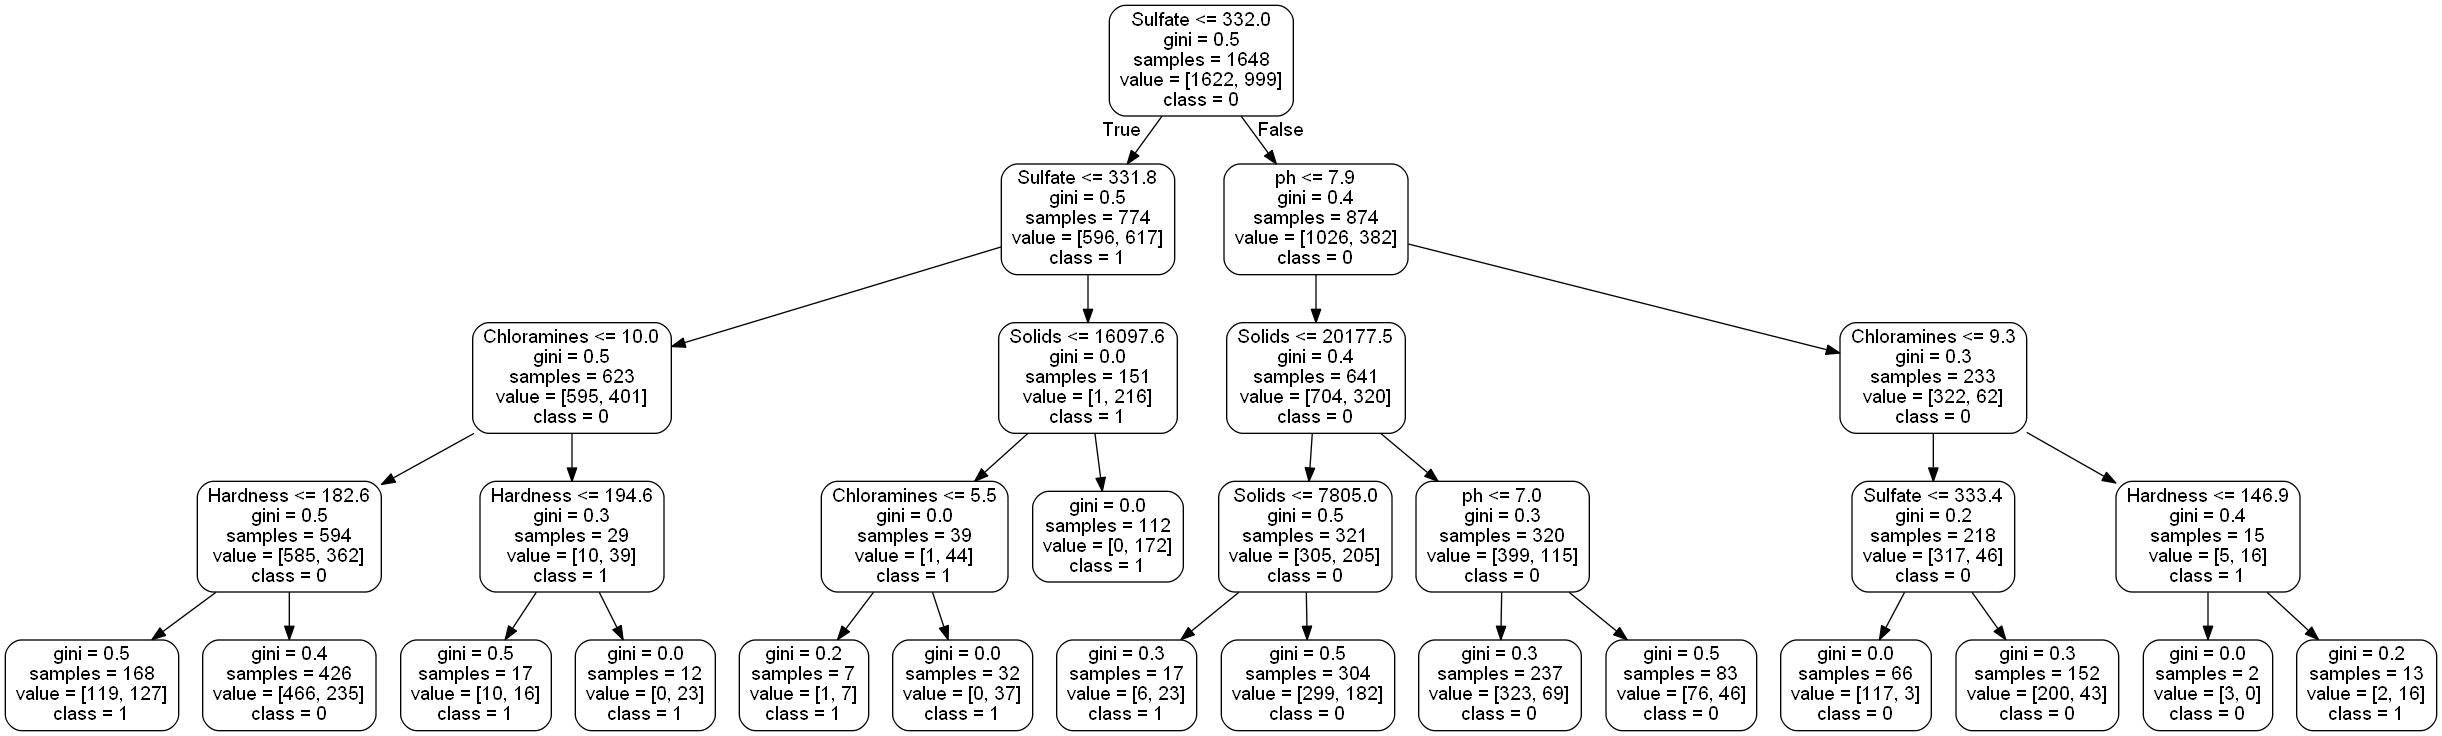

In [59]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.named_estimators_['Random Forest'].estimators_[7]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.named_estimators_['Random Forest'].estimators_[7]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_cols, rounded = True, precision = 1,class_names=['0','1'])
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image(graph.create_png())